<a href="https://www.kaggle.com/code/vijayalakshmideepak/diamond-eda?scriptVersionId=153573023" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diamonds/diamonds.csv


In [2]:
import numpy as np                     

import pandas as pd
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', None)         # To display all the data in each column
pd.set_option('display.max_columns', None)          # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore') 

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [4]:
df = pd.read_csv("/kaggle/input/diamonds/diamonds.csv")
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

# Description of the Dataset

* This dataset contains the prices and other attributes of almost 54,000 diamonds. Each row seems to represent a different diamond with various attributes such as carat, cut, color, clarity, measurements (x, y, z), depth, table, and price.

## **Column Description**

**price** -- price in US dollars (\$326--\$18,823)

**carat** -- weight of the diamond (0.2--5.01)

**cut** -- quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color** -- diamond colour, from J (worst) to D (best)

**clarity** -- a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x** -- length in mm (0--10.74)

**y** -- width in mm (0--58.9)

**z** -- depth in mm (0--31.8)

**depth** -- total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table** -- width of top of diamond relative to widest point (43--95)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df= df.drop(df.columns[0], axis =1)
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [7]:
df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

* The depth of the diamonds, calculated as the depth percentage, varies within a range of 43% to 79% with a relatively small deviation from the mean.
* The width of the top facet concerning the diamond's average diameter spans from 43% to 95%, with a moderate deviation from the average.
* Prices of diamonds within the dataset range from 326 to 18823, with a considerable spread around the mean price.
* In x, y, z columns the measurements display notable disparities. **The minimum values of 0.00 are irregular and might indicate missing or inaccurate data**. **The maximum values, especially for y and z, are considerably higher than typical diamond measurements, which could also suggest anomalies or errors in data entry.**

# Pandas Profiling before Data Preprocessing

In [8]:
import pandas_profiling

In [9]:
df.profile_report(title="Diamonds_EDA profiling before preprocessing")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [11]:
df.duplicated().sum()

146

# Data Cleaning 

In [12]:
df_clean = df[(df['x'] !=0) & (df['y'] !=0) & (df['z'] !=0)]
df_clean

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53920 rows x 10 columns]

In [13]:
df_clean.describe()

carat         depth         table         price             x  \
count  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000   
mean       0.797698     61.749514     57.456834   3930.993231      5.731627   
std        0.473795      1.432331      2.234064   3987.280446      1.119423   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5323.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53920.000000  53920.000000  
mean       5.734887      3.540046  
std        1.140126      0.702530  
min        3.680000      1.070000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

# Outliers

In [14]:
# remove outliers in the column y and z

def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

# Remove outliers from columns 'y' and 'z'
df_clean = remove_outliers(df_clean, 'y')
df_clean = remove_outliers(df_clean, 'z')

In [15]:
df_clean.describe()

carat         depth         table         price             x  \
count  53881.000000  53881.000000  53881.000000  53881.000000  53881.000000   
mean       0.796067     61.748622     57.456372   3923.945101      5.729215   
std        0.469471      1.430341      2.233463   3978.151710      1.115809   
min        0.200000     43.000000     43.000000    326.000000      3.730000   
25%        0.400000     61.000000     56.000000    949.000000      4.710000   
50%        0.700000     61.800000     57.000000   2400.000000      5.700000   
75%        1.040000     62.500000     59.000000   5315.000000      6.540000   
max        3.050000     79.000000     95.000000  18823.000000      9.420000   

                  y             z  
count  53881.000000  53881.000000  
mean       5.731091      3.537899  
std        1.107823      0.689010  
min        3.680000      1.410000  
25%        4.720000      2.910000  
50%        5.710000      3.520000  
75%        6.540000      4.030000  
max        9.260000      5.690000

# EDA

<Figure size 1200x500 with 0 Axes>

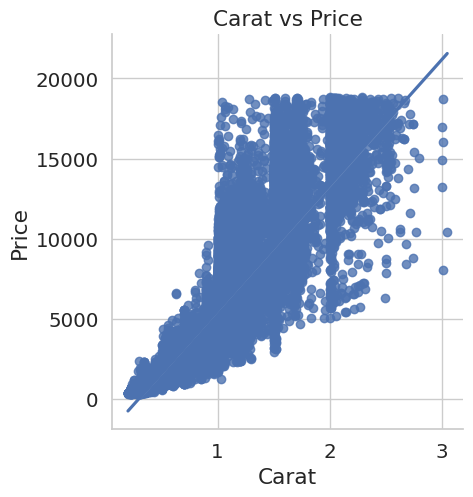

In [16]:
# Correlation between the diamond's carat weight and its price?
plt.figure(figsize=(12, 5))

sns.lmplot(x='carat', y='price', data=df_clean)
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

*  The plot indicating a consistent increase in price when the Carat of diamond increases hence there's a linear relationship between carat and price.

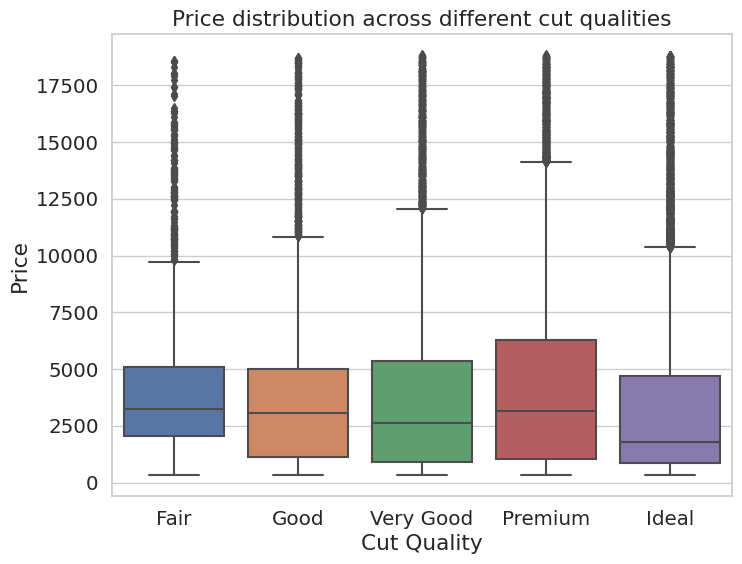

         cut        price
0       Fair  4272.487774
1       Good  3914.588932
2      Ideal  3455.438658
3    Premium  4571.032537
4  Very Good  3979.685684


In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='cut', y='price', data=df_clean, order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title('Price distribution across different cut qualities')
plt.xlabel('Cut Quality')
plt.ylabel('Price')
plt.show()

# Calculate average prices for each cut quality
avg_prices = df_clean.groupby('cut')['price'].mean().reset_index()
print(avg_prices)

* The "Ideal" cut, despite having a lower average price, might be highly valued for its precision and brilliance compared to other categories.
* Higher average prices for certain cuts, such as "Fair" or "Premium," might indicate a preference for specific characteristics or rarity within categories.
* The unique features of "Fair" or "Premium" cuts to justify higher prices, or emphasizing the value proposition of "Ideal" cuts despite their comparatively lower average prices.

In [18]:
# Which combination of cut, color, and clarity tends to yield the highest and lowest prices?
# Are there specific combinations that consistently demand premium prices?

# Group by combination of cut, color, and clarity and calculate average prices
combination_prices = df_clean.groupby(['cut', 'color', 'clarity'])['price'].mean().reset_index()

# Sort combinations by average price in descending order
sorted_combinations = combination_prices.sort_values('price', ascending=False)

# Find combinations with the highest and lowest average prices
highest_prices = sorted_combinations.head(5)  # Adjust the number to get top combinations
lowest_prices = sorted_combinations.tail(5)   # Adjust the number to get bottom combinations

print("Top Combinations with Highest Prices:")
print(highest_prices)
print("\nBottom Combinations with Lowest Prices:")
print(lowest_prices)

Top Combinations with Highest Prices:
           cut color clarity         price
221  Very Good     D      IF  10298.260870
53        Good     D      IF  10030.333333
165    Premium     D      IF   9056.500000
215    Premium     J     SI2   7480.537500
218    Premium     J    VVS1   7244.375000

Bottom Combinations with Lowest Prices:
           cut color clarity        price
61        Good     E      IF  1519.222222
149      Ideal     I      IF  1502.621053
24        Fair     G      IF  1488.000000
202    Premium     H    VVS1  1453.758929
269  Very Good     J      IF  1074.125000


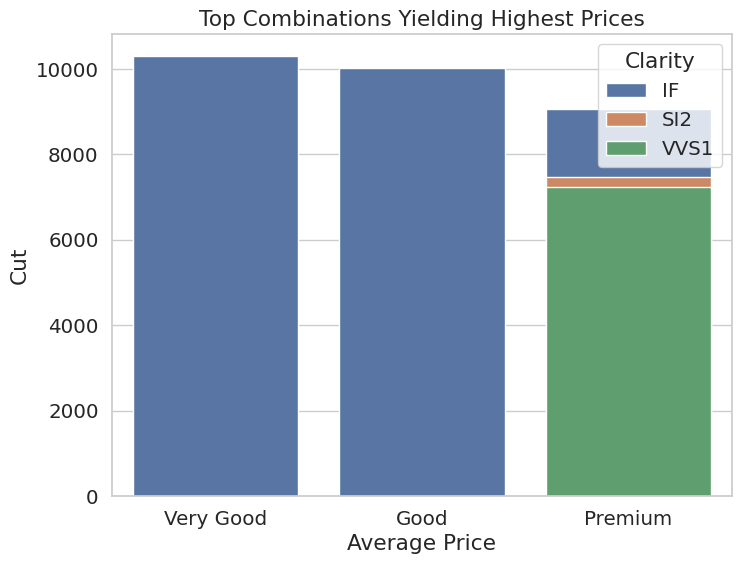

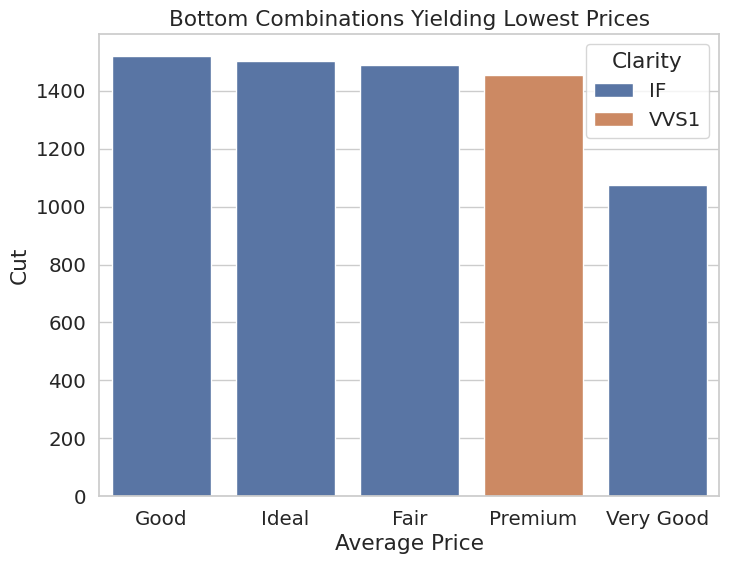

In [19]:
# Visualize top combinations
plt.figure(figsize=(8, 6))
sns.barplot(x='cut', y='price', data=highest_prices, hue='clarity', dodge=False)
plt.title('Top Combinations Yielding Highest Prices')
plt.xlabel('Average Price')
plt.ylabel('Cut')
plt.legend(title='Clarity')
plt.show()

# Visualize bottom combinations
plt.figure(figsize=(8, 6))
sns.barplot(x='cut', y='price', data=lowest_prices, hue='clarity', dodge=False)
plt.title('Bottom Combinations Yielding Lowest Prices')
plt.xlabel('Average Price')
plt.ylabel('Cut')
plt.legend(title='Clarity')
plt.show()

* **Top Combinations with Highest Prices**:

    * **Very Good cut, D color, IF clarity**: Exceptional combination commanding the highest average price of around 10,298,indicating rarity and superior quality.
    * **Premium cut, J color, SI2 clarity**: Despite a lower color grade, this combination boasts a substantial average price of 7,480, indicating the importance of clarity and cut in pricing.
    
* **Bottom Combinations with Lowest Prices:**    
   
   * **Very Good cut, J color, IF clarity**: Despite a Very Good cut and IF clarity, this combination yields the lowest average price of about 1,074, suggesting a substantial impact of color grade on pricing.
   * **Premium cut, H color, VVS1 clarity**: Despite the Premium cut, the combination of H color and VVS1 clarity results in a lower average price of about 1,453, highlighting the role of color and clarity in determining prices.
   * **Good cut, E color, IF clarity**: Despite a Good cut and IF clarity, the E color grade contributes to a relatively low average price of around 1,519, indicating color's impact on pricing.    

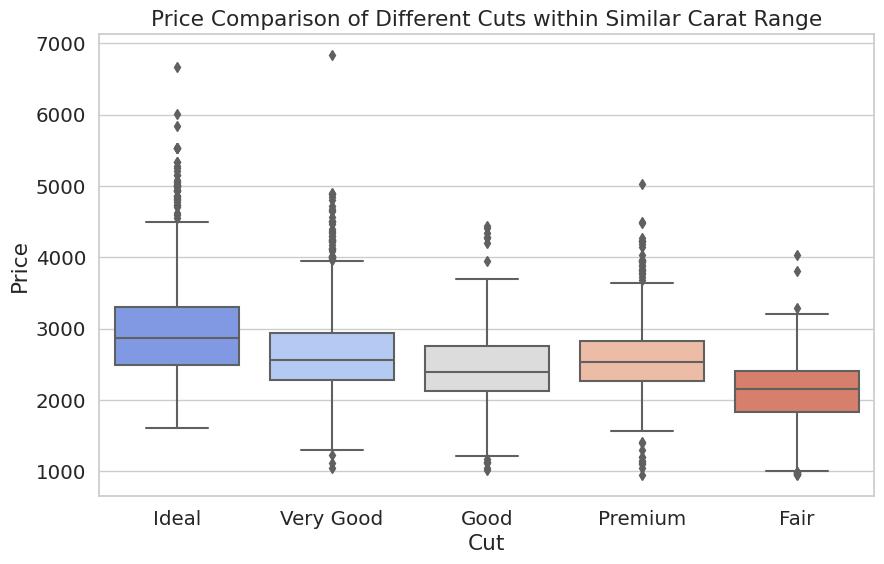

In [20]:
# Is there any discernible pattern between the price and the combination of carat, cut, color, and clarity?

selected_carat_range = df_clean[(df_clean['carat'] >= 0.7) & (df_clean['carat'] <= 0.8)]

# Create a boxplot to compare prices of diamonds in the selected carat range but different cuts
plt.figure(figsize=(10, 6))
sns.boxplot(x='cut', y='price', data=selected_carat_range, palette='coolwarm')
plt.title('Price Comparison of Different Cuts within Similar Carat Range')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()

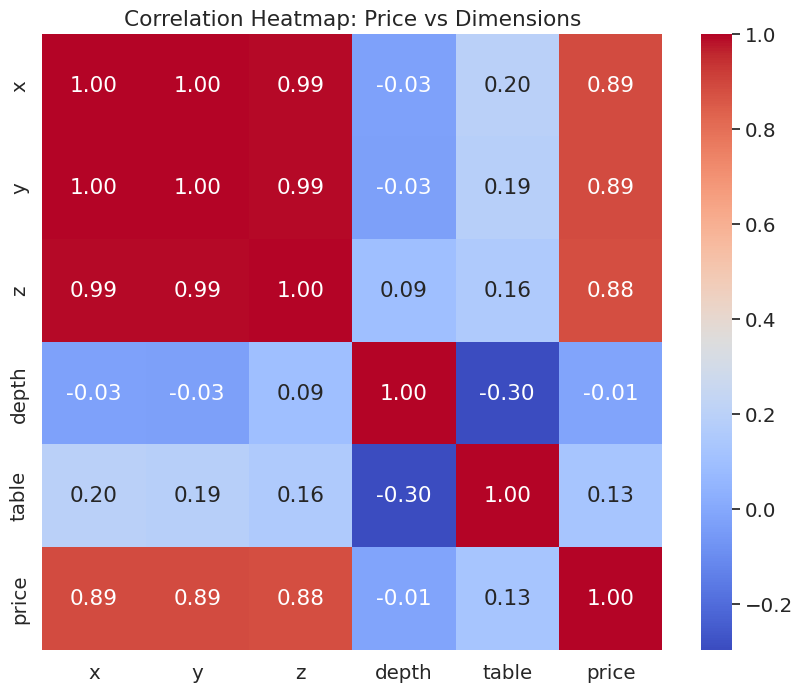

In [21]:
# Explore the relationship between price and dimensions (x, y, z, depth, table).
# Is there a pattern indicating that certain dimensions contribute more to higher prices?

dimensions_columns = ['x', 'y', 'z', 'depth', 'table', 'price']

# Calculate correlations between dimensions and price
correlation_matrix = df_clean[dimensions_columns].corr()

# Plotting heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap: Price vs Dimensions')
plt.show()

*  The dimensions x, y, and z exhibit very high positive correlations with each other, close to 1. This suggests strong linear relationships among these dimensions, indicating well-proportioned diamonds.
*  There's a slight negative correlation between depth and table (-0.30), indicating a weak inverse relationship between these two dimensions. As one increases, the other tends to decrease slightly.

  color        price
0     D  3166.217186
1     E  3076.102818
2     F  3724.201028
3     G  3994.945311
4     H  4472.536374
5     I  5061.821898
6     J  5295.309643
  clarity        price
0      I1  3651.539106
1      IF  2864.839106
2     SI1  3993.966008
3     SI2  5043.475251
4     VS1  3839.589128
5     VS2  3921.660736
6    VVS1  2519.512315
7    VVS2  3283.737071


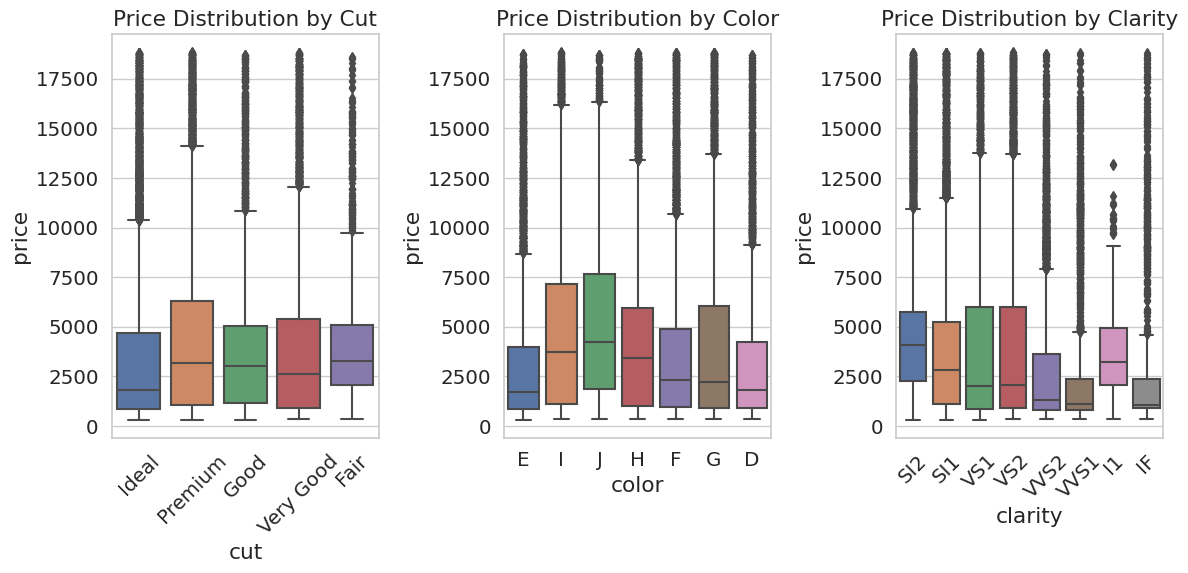

In [22]:
# Visualize price distributions for different attributes using boxplots
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x='cut', y='price', data=df_clean)
plt.title('Price Distribution by Cut')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='color', y='price', data=df_clean)
plt.title('Price Distribution by Color')
color_avg_prices = df_clean.groupby('color')['price'].mean().reset_index()
print(color_avg_prices)
plt.subplot(1, 3, 3)
sns.boxplot(x='clarity', y='price', data=df_clean)
plt.title('Price Distribution by Clarity')
plt.xticks(rotation=45)
clarity_avg_prices = df_clean.groupby('clarity')['price'].mean().reset_index()
print(clarity_avg_prices)

plt.tight_layout()
plt.show()

* The overall trend indicates that as diamonds move towards higher color grades (from D to J), their prices tend to rise consistently, aligning with the industry standard where colorless diamonds (D-F) often hold higher value.

* Clarity grades SI2 and VS2 showcase notably higher average prices compared to other grades, indicating a considerable price range within these categories.
* SI2 clarity, despite being less clear than VS2, commands a higher average price, suggesting that factors beyond clarity, like market perception or demand, could influence pricing within these categories.





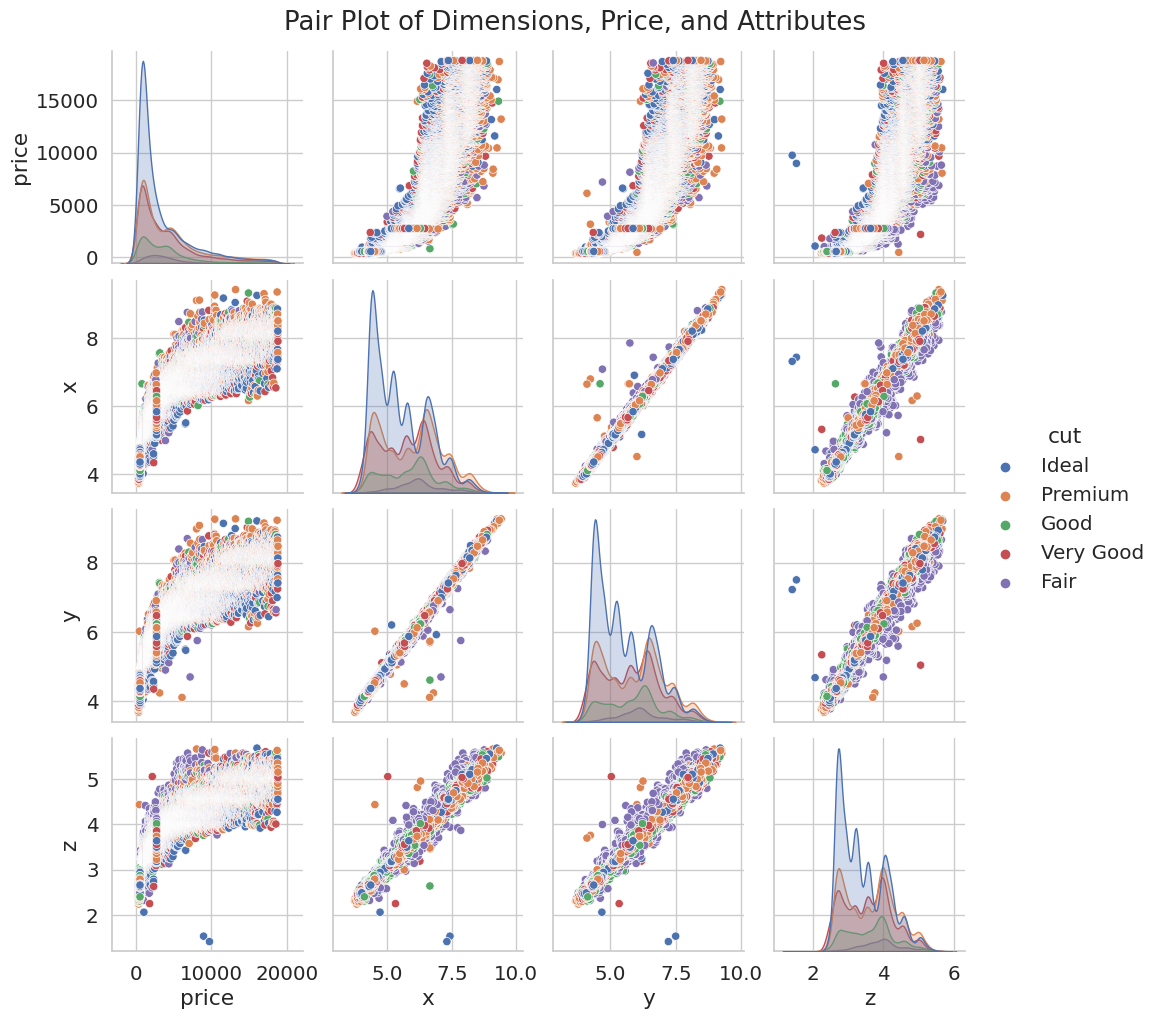

In [23]:
# How do the dimensions (x, y, z) relate to the price and other attributes?

attributes = ['price', 'x', 'y', 'z', 'cut', 'color', 'clarity']

# Create pair plots for selected attributes
sns.pairplot(df_clean[attributes], hue='cut', diag_kind='kde')
plt.suptitle('Pair Plot of Dimensions, Price, and Attributes', y=1.02)
plt.show()

* The above plot reveal how dimensions (x, y, z) relate to price, colored by different diamond cuts (e.g., Ideal, Premium, etc.). Each point represents a diamond, and the spread or trend of points indicates how the dimensions and price vary concerning different cuts.
* The kernel density plots display the distribution of each individual variable along the diagonal. They show how each dimension, price, and cut are distributed independently.
